# Implications of adopting differing window choices for smoothening Utilization Ratio

*Danilo Lessa Bernardineli (BlockScience), February 2024*

In [30]:
import pandas as pd 
import plotly.express as px
import plotly.io as pio
import numpy as np
import scipy.stats as st

pio.renderers.default = "svg"

In [62]:
from mockseries.noise import RedNoise
from datetime import datetime, timedelta
from mockseries.utils import datetime_range

noise = RedNoise(mean=0.02, std=0.04, correlation=0.5)


time_points = datetime_range(
    granularity=timedelta(seconds=15),
    start_time=datetime(2021, 5, 1),
    end_time=datetime(2021, 5, 5),
)
ts_values = noise.generate(time_points=time_points)



In [63]:
num_blocks = 100
smooth_g = 0
k = 0.1

data = []
for i, _g in enumerate(ts_values):
    g = min(max(_g, 0), 1)
    if i == 0:
        smooth_g = g
    elif i < num_blocks:
        smooth_g = (g + smooth_g) / 2
    elif i >= num_blocks:
        smooth_g = k * g + (1 - k) * smooth_g
    else:
        raise Exception()
    
    data.append({'t': i,
                 'g': g,
                 'g_smooth': smooth_g})

df = pd.DataFrame(data).set_index('t')

<Axes: xlabel='t'>

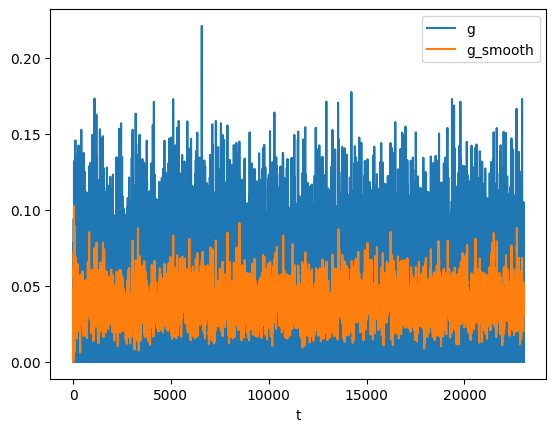

In [64]:
df[['g', 'g_smooth']].plot()

In [65]:
df[['g', 'g_smooth']].mean()

g           0.039252
g_smooth    0.039247
dtype: float64

<Axes: xlabel='t'>

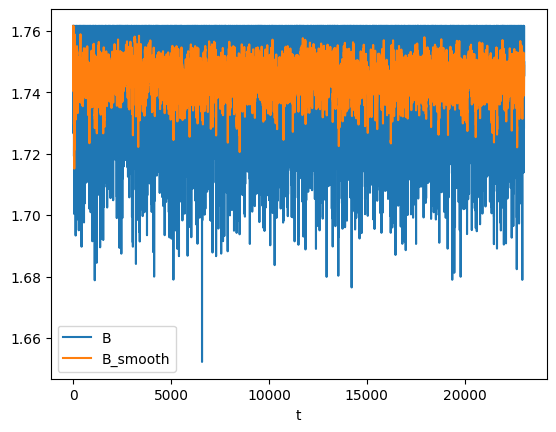

In [66]:
def block_reward(g, a=1, b=1, c=1, d=1):
    return a + b * np.tanh(-c * (g - d))


df['B'] = block_reward(df.g)
df['B_smooth'] = block_reward(df.g_smooth)

df[['B', 'B_smooth']].plot()

In [60]:
df[['B', 'B_smooth']].mean()

B           1.721662
B_smooth    1.722354
dtype: float64

In [61]:
df[['B', 'B_smooth']].std()

B           0.023317
B_smooth    0.008688
dtype: float64